In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 20 

In [2]:

data_r = np.loadtxt('./r.txt')
data_s = np.loadtxt('./s.txt')
data_c = np.loadtxt('./c.txt')
data_time = np.loadtxt('./time.txt')
print(data_time.shape)
print(data_r.shape)
print(data_s.shape)
print(data_c.shape)

(100000, 1001)
(100000, 1001)
(100000, 1001)
(100000, 1001)


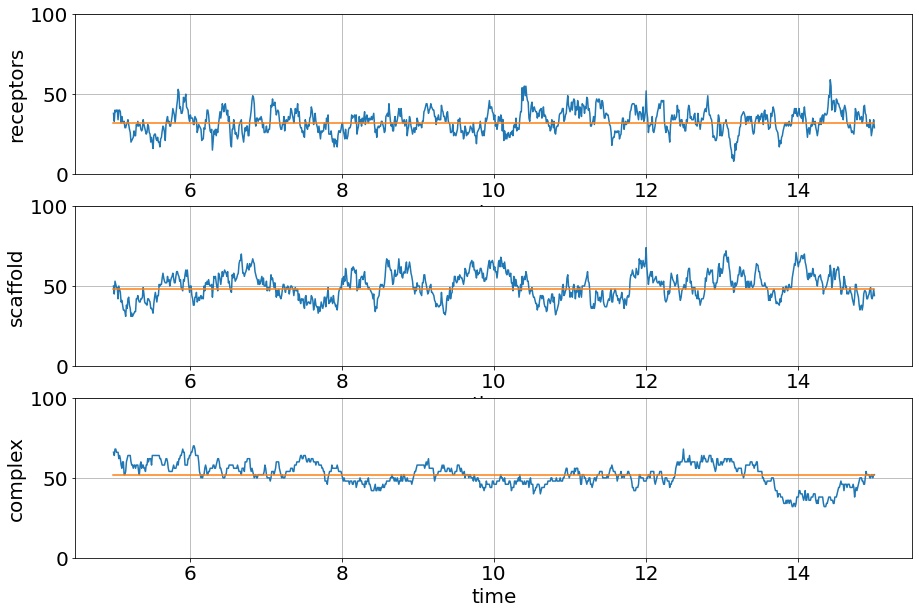

In [47]:
fig, axs = plt.subplots(3,figsize=(15, 10))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(data_time[1], data_r[1])
axs[0].plot(data_time[1], np.ones(np.size(data_time,1)) * 32.1)

axs[0].set_ylim([0, 100])
axs[0].set_xlabel(r'time')
axs[0].set_ylabel(r'receptors')

axs[1].plot(data_time[1], data_s[1])
axs[1].plot(data_time[1], np.ones(np.size(data_time,1)) * 48.2)

axs[1].set_ylim([0, 100])
axs[1].set_xlabel(r'time')
axs[1].set_ylabel(r'scaffold')

axs[2].plot(data_time[2], data_c[2])
axs[2].plot(data_time[2], np.ones(np.size(data_time,1)) * 51.77)

axs[2].set_ylim([0, 100])
axs[2].set_xlabel(r'time')
axs[2].set_ylabel(r'complex')
plt.show()

In [3]:
mean_r = np.mean(data_r,0)
mean_s = np.mean(data_s,0)
mean_c = np.mean(data_c,0)
std_r = np.std(data_r,0)
std_s = np.std(data_s,0)
std_c = np.std(data_c,0)
time = data_time[0]
print(mean_r.shape,std_r.shape)

(1001,) (1001,)


In [5]:
C_rs = np.corrcoef(data_r, data_s, rowvar=False)
C_rs

array([[ 1.00000000e+00,  8.53206422e-01,  7.28826114e-01, ...,
         7.83357522e-04,  4.92689101e-04, -9.55869670e-04],
       [ 8.53206422e-01,  1.00000000e+00,  8.53016611e-01, ...,
         8.93326421e-04,  5.36394666e-04, -2.43688800e-04],
       [ 7.28826114e-01,  8.53016611e-01,  1.00000000e+00, ...,
         6.48743873e-04,  7.60977678e-04, -3.00565647e-04],
       ...,
       [ 7.83357522e-04,  8.93326421e-04,  6.48743873e-04, ...,
         1.00000000e+00,  9.27735124e-01,  8.65236742e-01],
       [ 4.92689101e-04,  5.36394666e-04,  7.60977678e-04, ...,
         9.27735124e-01,  1.00000000e+00,  9.28670474e-01],
       [-9.55869670e-04, -2.43688800e-04, -3.00565647e-04, ...,
         8.65236742e-01,  9.28670474e-01,  1.00000000e+00]])

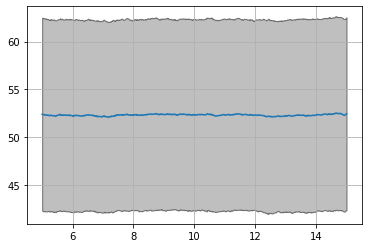

In [35]:
plt.plot(time, mean_c)
plt.fill_between(time, mean_c-std_c, mean_c+std_c,  facecolor = '0.5', edgecolor = '0', alpha = 0.5)
plt.show()

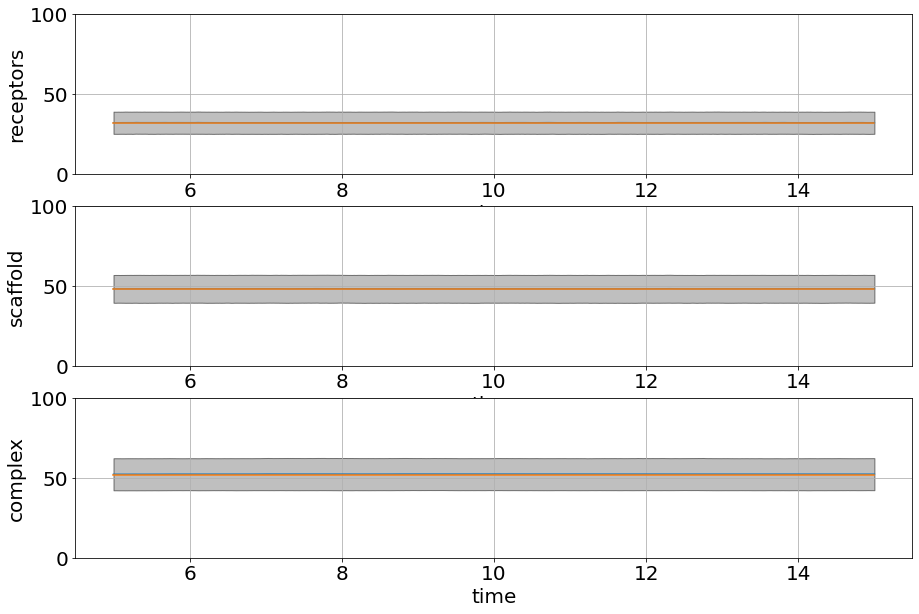

In [48]:
fig, axs = plt.subplots(3,figsize=(15, 10))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(time, mean_r)
axs[0].plot(time, np.ones(np.size(time)) * 32.1)
axs[0].fill_between(time, mean_r-std_r, mean_r+std_r,  facecolor = '0.5', edgecolor = '0', alpha = 0.5)

axs[0].set_ylim([0, 100])
axs[0].set_xlabel(r'time')
axs[0].set_ylabel(r'receptors')


axs[1].plot(time, mean_s)
axs[1].plot(time, np.ones(np.size(time)) * 48.2)
axs[1].fill_between(time, mean_s-std_s, mean_s+std_s,  facecolor = '0.5', edgecolor = '0', alpha = 0.5)

axs[1].set_ylim([0, 100])
axs[1].set_xlabel(r'time')
axs[1].set_ylabel(r'scaffold')

axs[2].plot(time, mean_c)
axs[2].plot(time, np.ones(np.size(time)) * 51.77)
axs[2].fill_between(time, mean_c-std_c, mean_c+std_c,  facecolor = '0.5', edgecolor = '0', alpha = 0.5)

axs[2].set_ylim([0, 100])
axs[2].set_xlabel(r'time')
axs[2].set_ylabel(r'complex')
plt.show()

In [4]:
C_rs = np.corrcoef(data_r, data_s, rowvar=False)
C_rc = np.corrcoef(data_r, data_c, rowvar=False)
C_cs = np.corrcoef(data_c, data_s, rowvar=False)


In [5]:
C_ss = np.corrcoef(data_s, rowvar=False)
print(std_r.shape, std_s.shape, std_c.shape)

(1001,) (1001,) (1001,)


In [13]:
C_rs_neg_time = np.copy(C_rs[1001,:1001])
C_rc_neg_time = np.copy(C_rc[1001,:1001])
C_cs_neg_time = np.copy(C_cs[1001,:1001])
time_cross = np.concatenate((np.flip(5. - time), time - 5.), axis=None)
C_cs_neg_time, C_cs[1001,:1001]

(array([0.13859381, 0.15947752, 0.17587009, ..., 0.00281511, 0.00208436,
        0.00312667]),
 array([0.13859381, 0.15947752, 0.17587009, ..., 0.00281511, 0.00208436,
        0.00312667]))

In [17]:
Corr_rs = np.copy(C_rs[0,1001:])
Corr_rc = np.copy(C_rc[0,1001:])
Corr_cs = np.copy(C_cs[0,1001:])
for k in range(1, 1000):
    Corr_rs += np.concatenate((C_rs[k,(1001+k):],C_rs[0,-k:]), axis=None)
    Corr_rc += np.concatenate((C_rc[k,(1001+k):],C_rc[0,-k:]), axis=None)
    Corr_cs += np.concatenate((C_cs[k,(1001+k):],C_cs[0,-k:]), axis=None)
    C_rs_neg_time += np.concatenate((C_rs[1001,:k],C_rs[1001+k,:(1001-k)]), axis=None)
    C_rc_neg_time += np.concatenate((C_rc[1001,:k],C_rc[1001+k,:(1001-k)]), axis=None)
    C_cs_neg_time += np.concatenate((C_cs[1001,:k],C_cs[1001+k,:(1001-k)]), axis=None)
Corr_rs /= 1001.
Corr_rc /= 1001.
Corr_cs /= 1001.
C_rs_neg_time = np.flip(C_rs_neg_time) / 1001.
C_rc_neg_time = np.flip(C_rc_neg_time) / 1001.
C_cs_neg_time = np.flip(C_cs_neg_time) / 1001.
C_cs_neg_time

array([0.02160068, 0.02160107, 0.02157683, ..., 0.17565794, 0.15931895,
       0.13845522])

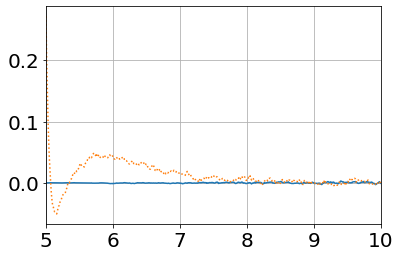

In [18]:
plt.plot(time, C_rs_neg_time)
plt.plot(time, C_rs[1001,:1001], linestyle = 'dotted')
plt.xlim([5,10])
plt.show()

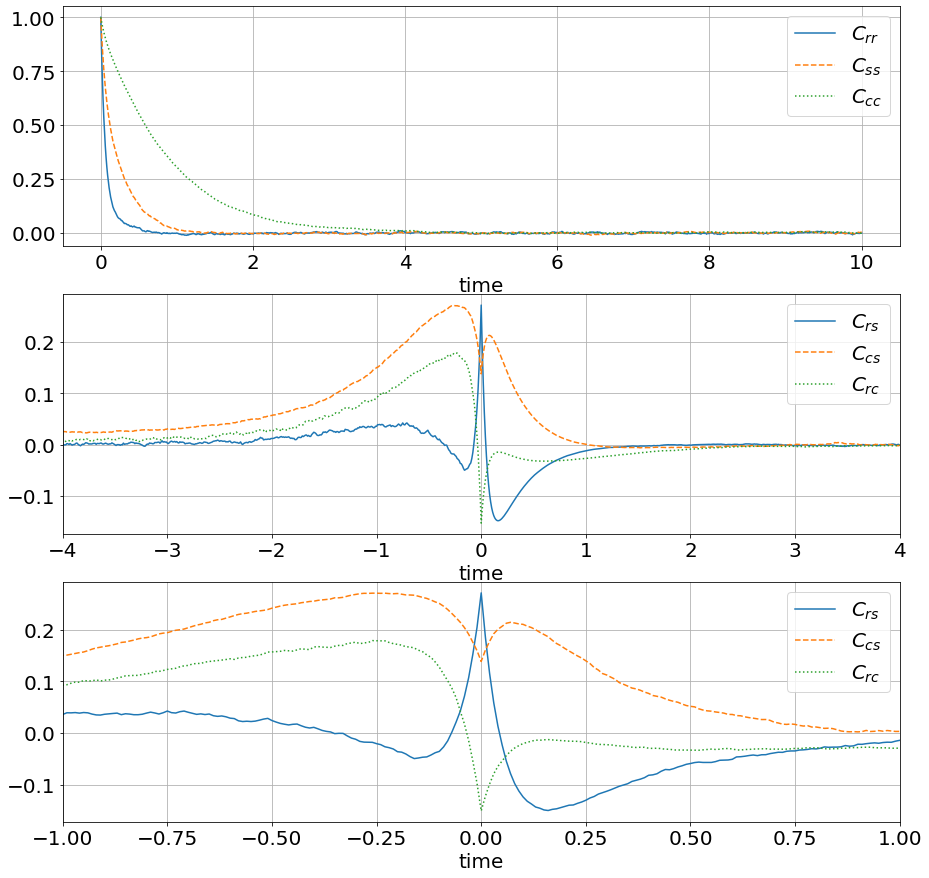

In [22]:
fig, axs = plt.subplots(3,figsize=(15, 15))
# fig.suptitle('Vertically stacked subplots')
axs[0].plot(time - 5, C_rs[0,:1001], label = r"$C_{rr}$")
axs[0].plot(time - 5, C_rs[1001,1001:], linestyle = 'dashed', label = r"$C_{ss}$")
axs[0].plot(time - 5, C_cs[0,:1001], linestyle = 'dotted', label = r"$C_{cc}$")

axs[0].set_xlabel(r'time')
axs[0].legend()

axs[1].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(Corr_rs)), axis=None), label = r"$C_{rs}$")
axs[1].plot(time_cross, np.concatenate((C_cs_neg_time,np.array(Corr_cs)), axis=None), linestyle = 'dashed', label = r"$C_{cs}$")
axs[1].plot(time_cross, np.concatenate((C_rc_neg_time,np.array(Corr_rc)), axis=None), linestyle = 'dotted', label = r"$C_{rc}$")

axs[1].legend()
axs[1].set_xlabel(r'time')
axs[1].set_xlim([-4, 4])

axs[2].plot(time_cross, np.concatenate((C_rs_neg_time,np.array(C_rs[0,1001:])), axis=None), label = r"$C_{rs}$")
axs[2].plot(time_cross, np.concatenate((C_cs_neg_time,np.array(C_cs[0,1001:])), axis=None), linestyle = 'dashed', label = r"$C_{cs}$")
axs[2].plot(time_cross, np.concatenate((C_rc_neg_time,np.array(C_rc[0,1001:])), axis=None), linestyle = 'dotted', label = r"$C_{rc}$")

axs[2].legend()
axs[2].set_xlabel(r'time')
axs[2].set_xlim([-1, 1])
plt.show()